# Random Forest and Gradient Boosted Trees

In this lab assignment, you will implement a simplified version of Random Forest classifier and practice how to use and fine-tune Random Forest and Gradient Boosted Trees in scikit-learn. By comparing the model performance of various classifiers on a synthetic dataset, ranging from simple linear model to ensemble tree-based models (i.e. random forest and gradient boosted trees), we demonstrate the power of ensemble models in modeling complexity non-linear classification problems.

In [45]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample

# make this notebook's output stable across runs
np.random.seed(0)

In [46]:
# helper functions used in this lab
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

## Implementation of Random Forest Classifier

<span style="color:orange">**Coding Part 1: Implement a simplified version of Random Forest.**</span> 

### Synthetic Moon dataset
In this lab, we will classify a moon shaped synthetic dataset with two features (_x1_ and _x2_) and two classes (0 or 1) with some added noise. 

In [47]:
# load the moon train and test data from CSV files
train = pd.read_csv("moon_train.csv")
test = pd.read_csv("moon_test.csv")

train_x = train.iloc[:,0:2]
train_y = train.iloc[:,2]

test_x = test.iloc[:,0:2]
test_y = test.iloc[:,2]

print("Number of train data: {}".format(len(train_y)))
print("Number of test data: {}".format(len(test_y)))

Number of train data: 3000
Number of test data: 1000


Text(0, 0.5, 'x2')

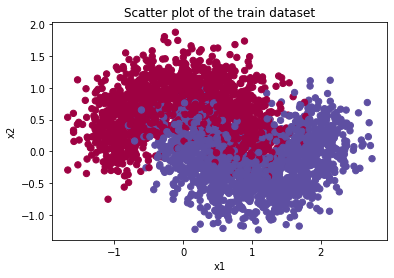

In [48]:
# plot the train dataset
plt.scatter(train_x.x1, train_x.x2, s=40, c=train_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the train dataset')
plt.xlabel('x1')
plt.ylabel('x2')

Text(0, 0.5, 'x2')

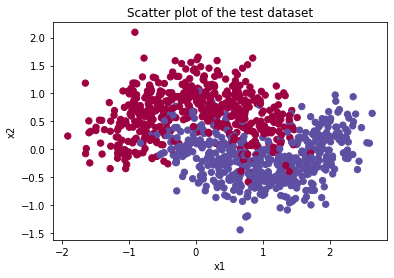

In [49]:
# plot the test dataset
plt.scatter(test_x.x1, test_x.x2, s=40, c=test_y, cmap=plt.cm.Spectral)
plt.title('Scatter plot of the test dataset')
plt.xlabel('x1')
plt.ylabel('x2')

### Logistic Regression
First, we learn a linear regression classifier to separate the two classes in the moon dataset. Note that since logistic regression is a linear model, the decision boundary is a linear in the input space.

In [50]:
# Baseline 1: logistic regression classifier
parameters = {
    "penalty": ["l1", "l2"], 
    "C": [0.01, 0.1, 1]
}

lr_grid = GridSearchCV(LogisticRegression(), parameters, cv=3)
lr_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(lr_grid.best_score_))
print("The best hyper parameter setting is {}".format(lr_grid.best_params_))

The best score is 0.8456666666666667
The best hyper parameter setting is {'C': 1, 'penalty': 'l2'}


c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\dotslash\pycharmprojects\uw_school\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\dotslash\pycharmprojects\uw_school\venv\lib\

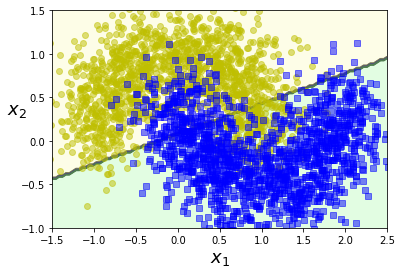

In [51]:
# plot the decision boundary
plot_decision_boundary(lr_grid, train_x.values, train_y.values)

In [73]:
# make prediction and evaluate the model performance on test data
test_z = lr_grid.predict(test_x)
test_z_prob = lr_grid.predict_proba(test_x)[:,1]


print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

[5.98041859e-01 9.94591512e-01 5.04831725e-01 1.13016908e-02
 6.49036563e-03 8.48059076e-01 4.77277400e-02 9.72183336e-01
 1.86954479e-04 6.28750551e-01 6.04327243e-02 6.52679943e-02
 4.49527830e-01 1.84171736e-02 8.74910869e-01 5.36651688e-02
 5.15678592e-01 7.47000887e-01 7.93280848e-01 6.16631183e-01
 9.96701021e-01 1.86494215e-01 2.94824645e-01 4.34838547e-02
 3.93451497e-02 4.81486006e-02 1.20986600e-01 8.92301789e-01
 6.49814818e-01 4.72838999e-02 6.52978749e-01 8.91689123e-01
 9.87940478e-01 3.03371743e-01 2.31588202e-01 7.24965949e-02
 8.64517148e-01 9.73933182e-01 8.78209188e-01 8.33624530e-01
 9.94613302e-01 8.16585170e-01 4.10068315e-01 1.84685619e-01
 1.84228110e-01 6.02934958e-01 1.87607709e-01 3.19836685e-01
 3.96088593e-02 8.33482010e-01 9.53349880e-01 5.77113350e-01
 7.33523049e-01 7.16082688e-01 1.77788903e-01 3.71694722e-01
 9.97895365e-01 9.67193337e-01 3.81351695e-01 7.30590876e-01
 1.27168266e-02 1.61480941e-02 2.29235371e-02 9.29345160e-01
 9.76937768e-01 9.597146

### Decision Tree Classifier
Then, we learn a decision tree classifier to separate the two classes in the moon dataset. Note that decision boundary is no longer linear.

In [53]:
# Baseline 2: Decision Tree classifier
parameters = {
    "max_depth": [2, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

dtc = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc, parameters, cv=3)
dtc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.8853333333333334
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05}


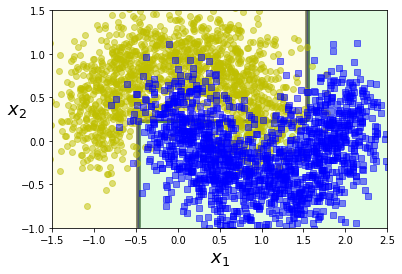

In [54]:
# plot the decision boundary
plot_decision_boundary(dtc_grid, train_x.values, train_y.values)

In [55]:
# make prediction and evaluate the model performance on test data
test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy: 0.892
model ROC AUC: 0.8990000000000001


### Implement a simplified version of Random Forest Classifier

In this exercise, you will implement the random forest classifier. 
- Use bootstrapping to generate different ensemble datasets, where you will train a separate classifier to each dataset.
- Apply grid search with cross-validation to learn and fine-tune each decision tree classifier.
- Implement two predict functions: one outputs the probabilities while the other outputs the predicted class.

In [104]:
class MyRandomForestClassifier:
    """
    Random Forest Classifier.
    """
    def __init__(self, n_estimators=100):
        # removed unused model parameter, and declaring as array here
        self.models = []
        self.n_estimators = n_estimators

    def train(self, x, y):
        """
        TODO: Train random forest classifier using bootstrapping and decision tree as the base classifier
        """
        total_samples, total_features = x.shape
        sample_size = int(total_samples / self.n_estimators)

        # Iterating over number of estimators to produce the models
        for i in range(self.n_estimators):
            # Create subset of samples
            sample_x, sample_y = resample(x, y, random_state=i, n_samples=sample_size, replace=True)

            # Create GridSearch model based on DTC; had to put this inside of the for loop (spent hours figuring that out)
            d_tree_grid_search = GridSearchCV(
                estimator=DecisionTreeClassifier(random_state=0),
                param_grid={
                    "max_depth": [2, 4],
                    "min_samples_split": [0.05, 0.1, 0.2],
                },
                cv=3
            )
            cv_model = d_tree_grid_search.fit(sample_x, sample_y)
            self.models.append(cv_model)

    def predict_proba(self, x):
        """
        TODO: Make predictions (probabilities) with the trained random forest
        """
        y_predictions = []
        for model in self.models:
            # taking the 2nd column of probability predictions
            y_predictions.append(model.predict_proba(x)[:,1])

        matrix_sum = np.sum(y_predictions, 0)
        return matrix_sum / self.n_estimators

    def predict(self, x):
        """
        TODO: Make predictions (the class/label) with the trained random forest
        """
        # Grabbing all predictions
        y_predictions = []
        for model in self.models:
            y_predictions.append(model.predict(x))

        # Summing of the predictions, and giving it a majority class vote
        matrix_sum = np.sum(y_predictions, 0)
        return ((matrix_sum / self.n_estimators) > 0.5).astype(int)

        

### Train, predict and evaluate the random forest classifier

Even though this is a simplified version of random forest, we should see it outperforms the decision tree classifier above.

In [105]:
# Use the trained random forest model to make predictions on the test data and evaluate the model performance.
# train random forest classifier
mrfc = MyRandomForestClassifier(100)
mrfc.train(train_x, train_y)

# make predictions with the trained random forest
test_z = mrfc.predict(test_x)
test_z_prob = mrfc.predict_proba(test_x)

# # evaluate the model performance
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))
print("ROC is much better, but accuracy is slightly (very little) worse")

model accuracy: 0.882
model ROC AUC: 0.941218
ROC is much better, but accuracy is slightly (very little) worse


---

## Random Forest

<span style="color:orange">**Coding Part 2: In this exercise, we will apply the Random Forest Classifier provided in scikit-learn to classify the synthetic moon data.**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default). Please refer to the [scikit-learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for more details on how to use the API.

In [103]:
# TODO: fine-tune Random Forest classifier using grid search with cross-validation (GridSearchCV).
parameters = {
    # specify the parameters
    "n_estimators": [25, 50, 75, 100],
    "max_depth": [2, 3, 4],
    "min_samples_split": [0.01, 0.025, 0.05, 0.1, 0.2],
    "criterion": ["gini", "entropy"]
}

# TODO: use grid search with cross-validation to fine-tune the model
rfc_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=0),
    param_grid=parameters,
    cv=3
)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.8930000000000001
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 0.01, 'n_estimators': 75}


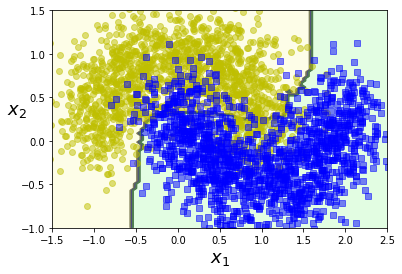

In [106]:
# plot the decision boundary
plot_decision_boundary(rfc_grid, train_x.values, train_y.values)

Notice that the decision boundary is no longer orthogonal to the x and y axises and is able to better separate the two classes in the moon dataset.

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate it's performance in terms of accuracy and ROC AUC. It should outperform our simplified version of Random Forest as there are more optimizations being implemented in scikit-learn API.

In [107]:
# TODO: make prediction and evaluate the model performance on test data
test_z = rfc_grid.predict(test_x) # TODO: make prediction
test_z_prob = rfc_grid.predict_proba(test_x) # TODO: make prediction of probabilities

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob[:,1])))
# I've tried a bunch of different parameters, and have gotten 90% accuracy at one point with a higher max depth. But all the classifiers
# are very similar-- there isn't a drastic difference, aside from this one being much easier to implement. The ROC is slightly improved over the custom implementation

model accuracy: 0.888
model ROC AUC: 0.9544


---

## Gradient Boosted Trees
<span style="color:orange">**Coding Part 3: In this exercise, we will apply the Gradient Boosted Tree classifier provided in scikit-learn to classify the synthetic moon dataset.**</span> 

Gradient Boosted Trees is a generalization of boosting to arbitrary differentiable loss functions, which can be used for both regression and classification problems. At a high level, gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. Gradient Boosted Trees, which is a special case of gradient boosting, uses regression trees as the base predictors and builds an additive model in a forward stage-wise fashion. In each stage, regression trees are fit on the negative gradient of the loss function used in a classification or a regression problem. Please refer to [Gradient Boosted Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) for more details on how to use the API.

Gradient boosting introduces a new hyperparameter *learning_rate*, which scales the contribution of each tree. If you set it to a low values, such as 0.1, you will need more trees in the ensemble to fit the training data, but the predictions will usually generalize better. This is a regularization technique called shrinkage. In the exercise below, please include *learning_rate* as a hyperparameter in the model fine-tuning.

In [108]:
# TODO: fine-tune Gradient Boosted Trees using grid search with cross-validation (GridSearchCV).
parameters = {
    # TODO: specify the parameters
    "n_estimators": [50, 100, 150],
    "max_depth": [2, 3, 4],
    "min_samples_split": [0.01, 0.025, 0.05, 0.1, 0.2],
    "learning_rate": [0.05, 0.1, 0.15]
}

gbc_grid = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=0),
    param_grid=parameters,
    cv=3
)# TODO: use grid search with cross-validation to fine-tune the model
gbc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9126666666666668
The best hyper parameter setting is {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_split': 0.05, 'n_estimators': 150}


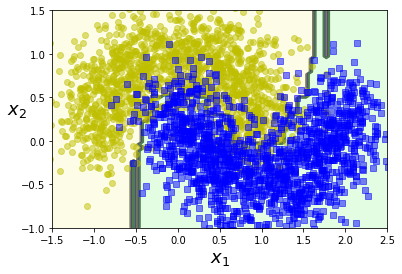

In [109]:
# plot the decision boundary for decision tree classifier
plot_decision_boundary(gbc_grid, train_x.values, train_y.values)

Now let's use the fine-tuned model to make predictions on the test dataset and evaluate its performance in terms of accuracy and ROC AUC.

In [110]:
# TODO: make prediction and evaluate the model performance on test data
test_z = gbc_grid.predict(test_x) # TODO: make prediction
test_z_prob = gbc_grid.predict_proba(test_x) # TODO: make prediction of probabilities

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob[:,1])))

model accuracy: 0.898
model ROC AUC: 0.962126


## Conclusion

By comparing the model performance as well as the decision boundaries learned from different classifiers on the same dataset, we clearly see Random Forest and Gradient Boosted Trees are capable of modeling more complex patterns in the data as compared to linear models and decision trees, leading to superior performance on the test dataset.

### End of ML 310 Lab Assignment 3
---

The random tree classifier takes random splices of the data set and trains competing trees against various sets of data.
Once the models finish, they compare their results and have a sort of majority voting mechanism that chooses
the highest probability prediction. For gradient boosting, separate models are trained on the error residuals and
weights are given to them to improve the model's accuracy. These classifiers are designed to predict class-type/non-continuous data.
The results seemed to progressively improve, from DTC, custom DTC w/ bagging (kind of RFC), RFC, and GBC, particularly in the ROC curve.
Model accuracy seemed relatively unchanged, with either minor improvements (or none).